# Yelp Data Challenge - Clustering and PCA

Lei Chen

Sep 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('../data/last_2_years_restaurant_reviews.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,address,...,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,avg_stars,state
0,--9e1ONYQuAa-CB_Rrw7Tw,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV
1,--9e1ONYQuAa-CB_Rrw7Tw,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV
2,--9e1ONYQuAa-CB_Rrw7Tw,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV
3,--9e1ONYQuAa-CB_Rrw7Tw,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV
4,--9e1ONYQuAa-CB_Rrw7Tw,0,2015-02-02,0,_Uwp6FO1X-avE9wqTMC59w,5,This place is first class in every way. Lobste...,0,-Z7Nw2UF7NiBSAzfXNA_XA,3355 Las Vegas Blvd S,...,"{'Monday': '11:30-14:0', 'Tuesday': '11:30-14:...",1.0,36.123183,-115.16919,Delmonico Steakhouse,The Strip,89109.0,1546.0,4.0,NV


## 1. Cluster the review text data for all the restaurants

### Define feature variables, here is the text of the review

In [3]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df.text.values
documents[:5]

array(["went for dinner tonight. Amazing my husband had lobster bisque and the T bone both were delish.I had the French onion soup and the pan seared duck. Cooked to perfection and I'm still raving about the flavor. If you are ever in Vegas this is a must try.",
       'This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return.',
       "My husband and I went there for lunch on a Saturday. We had a physically exhausting week so we decided to treat ourselves. But it hasn't always been easy for our allergy whenever we ate out. So we called Delmonico ahead to see if they can accommodate our special needs. The lady who answered our call was very courteous and we felt comfortable to try after having some answers from her.\r\nAs we arrived, the restaurant has a comfortable ambience. I wouldn't say it is grand or special but just comfortable. When it was time to order, the server was courteous regarding our allergy too and I believe the one who took care of us was 

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [4]:
# Make a column and take the values, save to a variable named "target"
target = df.stars.apply(lambda x: 1 if x == 5 else 0)
print(target.shape)
print(documents.shape)
print(df.shape[0])

(640718,)
(640718,)
640718


#### take a look at the statistic of the target variable

0.4741461922405801
0.49933152290734656


(array([336924.,      0., 303794.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

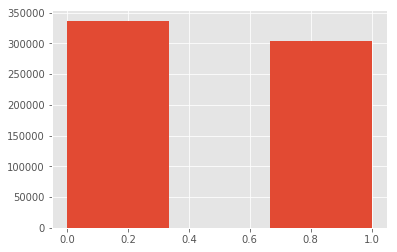

In [19]:
# To be implemented
print(target.mean())
print(target.std())
plt.hist(target, bins=3)

### Create training dataset and test dataset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# documents is X, target is y
# Now split the data to training set and test set
# start with a big "test_size", since large training set can easily crash the laptop..
X_train, X_test, y_train, y_test = train_test_split(documents, target, test_size=.3, random_state=3)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [9]:
# Train the model with training data
X_train_trans = tfidfvectorizer.fit_transform(X_train)

In [10]:
# Get the vocab of your tfidf
print(len(tfidfvectorizer.get_feature_names()))
vocab = tfidfvectorizer.get_feature_names()

1000


In [11]:
# Use the trained model to transform all the reviews
X_test_trans = tfidfvectorizer.transform(X_test)

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=100)

kmeans.fit(X_train_trans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.transform(X_test_trans)

array([[0.97064975, 0.9770163 ],
       [0.98941578, 0.95239868],
       [0.97731814, 0.9760926 ],
       ...,
       [0.98767799, 0.95149616],
       [0.99548136, 0.98182466],
       [0.97584691, 0.98142363]])

#### Make predictions on all your data

In [14]:
X_train_pred = kmeans.predict(X_train_trans)
X_test_pred = kmeans.predict(X_test_trans)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [15]:
kmeans.cluster_centers_

array([[0.00323478, 0.01031624, 0.00237968, ..., 0.00191143, 0.00314782,
        0.00572376],
       [0.00079248, 0.00429891, 0.00150226, ..., 0.00107785, 0.00303416,
        0.00704152]])

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [17]:
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster with 1000 max features:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(vocab[i] for i in centroid)))

top features for each cluster with 1000 max features:
0: good, food, place, just, like, time, ordered, order, chicken, service
1: great, food, service, place, amazing, good, love, best, friendly, vegas


#### Print out the review of a random sample of the reviews assigned to each cluster to get a sense of topic

In [48]:
assigned_cluster = kmeans.transform(X_train_trans).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X_train_trans.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    for review in sample_reviews:
        print("%s" % df.loc[review]['text'])

Moscow mule - 15
COCO mojo - 15
 Probably my least favorite Moscow Mule to date. It was mostly ice, the drink was gone I a matter of sips, and it was lacking in flavor, possibly because it was mostly ice. I know this is Vegas, but this was a bit ridiculous. The Coco mojo was probably not worth $15 but ok. Coconut rum drink, not that special. 

Those things being said we ventured back I later (we were staying at the Aria, which I HIGHLY recommend, and this place is nestled just out the side door) this time we tried several apps, and some new drinks. I'm not usually into "adult shakes" it mudslide type drinks because I think the alcohol is usually lost in the sweetness. That being said, their Irish shake is THE BEST! I could really taste the Jameson and it was delicious down to the last drop! I recommend all their apps, the only down side here was they were much more filling than we expected, we had dinner reservations later in the evening and this definitely hindered our appetite later.

#### Try different k
If set k == to a different number, how does the top features change?

In [ ]:
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(X_train_trans)
top_centroids_5 = kmeans_5.cluster_centers_.argsort()[:, -1:-11:-1]
print('top features for each cluster')
for num, centroid in enumerate(top_centroids_5):
    print('%d: %s' % (num, ", ".join(vocab[i] for i in centroid)))

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [51]:
assigned_cluster = kmeans.transform(X_train_trans).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X_train_trans.shape[0])[assigned_cluster==i]
    samples = np.random.choice(cluster, 3, replace=False)
    print("cluster %d" % i )
    for sample in samples:
        print("%d %s" % (df.loc[sample]['stars'], df.loc[sample]['text']))
    print()

cluster 0
3 I agree with all the other 3000 yelpers. This place is A-OK. Serendipity is known for their desserts, especially the frozen hot chocolate. Unfortunately, Serendipity is WAY overpriced for mediocre food.

The service was surprisingly slow given we only ordered one thing - a one-person portion of the frozen hot chocolate. But anyhow, the frozen hot chocolate was a good way to clench our sweet thirst after walking up and down The Strip. I just can't justify how that dinky cup (okay, it was not THAT dinky) was $10.
4 Love the food here for a great price. Always come before seeing shows at the Smith Center. My favorite is Pad Thai and the Spring Rolls are delicious.
1 Went here last week, Employees were rude and basically really didn't care. They were out of supplies so instead of telling me I just didn't get what I paid for.  I asked for two salads one Vegetarian which should have then got extra beans and rice which I didn't get, Then was charged $1.00 for extra sauce.  Ordered

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [63]:
# Find the business who got most reviews, get filtered df, name it df_top_restaurant
df_top_restaurant = df.business_id.value_counts().index[0]
print(df_top_restaurant)

RESDUcs7fIiihp38-d6_6g


We can also load restaurant profile information from the business dataset (optional)

In [64]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
df_business = pd.read_csv('../data/selected_business.csv', encoding = "ISO-8859-1")
df_business[df_business.business_id.values == df_top_restaurant]

,business_id,name,categories,avg_stars
6026,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0


### Vectorize the text feature

In [121]:
top_res = df[df.business_id == df_top_restaurant]
top_res.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,address,...,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,avg_stars,state
283639,RESDUcs7fIiihp38-d6_6g,0,2015-09-16,0,gkcPdbblTvZDMSwx8nVEKw,5,Got here early on football Sunday 7:30am as I ...,0,SKteB5rgDlkkUa1Zxe1N0Q,3570 S Las Vegas Blvd,...,"{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",1.0,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109.0,7866.0,4.0,NV
283640,RESDUcs7fIiihp38-d6_6g,0,2017-09-09,0,mQfl6ci46mu0xaZrkRUhlA,5,"This buffet is amazing. Yes, it is expensive,...",0,f638AHA_GoHbyDB7VFMz7A,3570 S Las Vegas Blvd,...,"{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",1.0,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109.0,7866.0,4.0,NV
283641,RESDUcs7fIiihp38-d6_6g,0,2017-02-08,0,lMarDJDg4-e_0YoJOKJoWA,2,This place....lol our server was nice. But fo...,0,A21zMqdN76ueLZFpmbue0Q,3570 S Las Vegas Blvd,...,"{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",1.0,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109.0,7866.0,4.0,NV
283642,RESDUcs7fIiihp38-d6_6g,0,2017-12-22,0,30xmXTzJwHPcqt0uvSLQhQ,3,One star knocked off for the cold air conditio...,0,uNHEnP28MMmVy96ZSJKaMA,3570 S Las Vegas Blvd,...,"{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",1.0,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109.0,7866.0,4.0,NV
283643,RESDUcs7fIiihp38-d6_6g,0,2015-02-21,0,g8ojbzP1xoX9dbDfQv2KJw,5,Miche better experience this time around. We w...,0,3cZPpN-IrA8CSc5PkZLbXA,3570 S Las Vegas Blvd,...,"{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",1.0,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109.0,7866.0,4.0,NV


In [104]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = top_res.text.values
documents_top_restaurant.shape

(4923,)

### Define target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [105]:
top_res_target = top_res.stars.apply(lambda x: 1 if x == 5 else 0)
top_res_target.shape

(4923,)

#### Check the statistic of the target variable

0.38939670932358317
0.4876630179362759


(array([3006.,    0., 1917.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

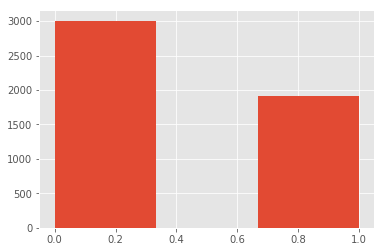

In [106]:
print(top_res_target.mean())
print(top_res_target.std())

plt.hist(top_res_target, bins=3)

### Create training dataset and test dataset

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# documents_top_restaurant is X, target_top_restaurant is y
# Now split the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(documents_top_restaurant, top_res_target, test_size=0.2, random_state=3)

### Get NLP representation of the documents

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [111]:
# Train the model with training data
X_train_trans = vectorizer.fit_transform(X_train)

In [112]:
# Get the vocab of your tfidf
vocab = vectorizer.get_feature_names()
vocab

['00',
 '10',
 '100',
 '11',
 '12',
 '15',
 '18',
 '20',
 '24',
 '25',
 '30',
 '30pm',
 '35',
 '3pm',
 '40',
 '45',
 '50',
 '54',
 '55',
 '57',
 '59',
 '60',
 '65',
 '70',
 '75',
 '80',
 '90',
 '99',
 'able',
 'absolutely',
 'actual',
 'actually',
 'add',
 'added',
 'additional',
 'afternoon',
 'ago',
 'ahead',
 'alaskan',
 'alcohol',
 'alright',
 'amazing',
 'ambiance',
 'american',
 'anymore',
 'appetite',
 'area',
 'aren',
 'aria',
 'array',
 'arrive',
 'arrived',
 'asian',
 'ask',
 'asked',
 'assortment',
 'ate',
 'atmosphere',
 'attention',
 'attentive',
 'authentic',
 'available',
 'average',
 'avoid',
 'away',
 'awesome',
 'awful',
 'bacchanal',
 'bacon',
 'bad',
 'baked',
 'bar',
 'barely',
 'based',
 'basically',
 'bass',
 'bbq',
 'beat',
 'beautiful',
 'beef',
 'beer',
 'believe',
 'bellagio',
 'belly',
 'benedict',
 'best',
 'better',
 'big',
 'bigger',
 'biggest',
 'birthday',
 'bisque',
 'bit',
 'bite',
 'bland',
 'bloody',
 'boba',
 'boiled',
 'bomb',
 'bone',
 'bother',


In [113]:
# Use the trained model to transform the test data
X_test_trans = vectorizer.transform(X_test)

In [114]:
# Use the trained model to transform all the data
doc_top_vector = vectorizer.transform(documents_top_restaurant)

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [115]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_train_trans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [116]:
train_pred = kmeans.predict(X_train_trans)
train_pred.shape

(3938,)

#### Make predictions on all your data

In [117]:
test_pred = kmeans.predict(X_test_trans)
test_pred.shape

(985,)

#### Inspect the centroids

In [118]:
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_)

(2, 1000)
[[0.00385907 0.01002463 0.00366665 ... 0.00585332 0.0008825  0.00347836]
 [0.0038695  0.00825403 0.00261277 ... 0.01032484 0.00297326 0.00504588]]


#### Find the top 10 features for each cluster.

In [119]:
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-11:-1]
print('top features for each cluster')
for num, centroid in enumerate(top_centroids):
    print('%d: %s' % (num, ", ".join(vocab[i] for i in centroid)))

top features for each cluster
0: food, buffet, vegas, wait, best, great, line, worth, time, good
1: crab, buffet, good, legs, food, seafood, like, station, dessert, section


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [123]:
assigned_cluster = kmeans.transform(X_train_trans).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X_train_trans.shape[0])[assigned_cluster==i]
    samples = np.random.choice(cluster, 3, replace=False)
    print('cluster %d:' % i)
    for sample in samples:
        print("%d:   %s" % (df.loc[sample]['stars'], df.loc[sample]['text']))

cluster 0:
4:   First visit tried the Banh Mi Dac Biet. Was quite good. My local preference for Banh Mi is Dakao, and that comes down to the bread, which wasn't bad at all at Kinh Do, but I think Dakao is a cut above. Others disagreed and preferred the bread here, so YMMV.

The innards of the sandwich I think were quite comparable. I want to do a side-by-side, but I will definitely be back at Kinh Do. OTOH, they were really really slow. I think I waited 15-20 minutes for a Banh Mi. But for $3.75 I guess who cares? Also my total was like $4.05, and I paid with a $5, and the woman there gave me $1.95 change. Rungood! But I gave it back, because, you know, karma and all.

Second trip I followed the Yelpers and got Bun Bo Hue. This was delicious, though with the offal and cubes of blood not really for the squeamish (stick to the pho). I will absolutely work soups and banh mi from here into my Vietnamese rotation; this is considerably better than some other places I've tried in town.
4:   I

## 3. Use PCA to reduce dimensionality

### Stardardize features
X_train and X_test

In [132]:
X_train_trans.toarray().shape

(3938, 1000)

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_trans.toarray())

X_test_scaled = scaler.transform(X_test_trans.toarray())

### Use PCA to transform data (train and test) and get princial components

In [149]:
from sklearn.decomposition import PCA

# Pick a n_components
n_components = 50

pca = PCA(n_components=n_components)

train_components = pca.fit_transform(X_train_scaled) # fit: get V, lambda

test_components = pca.transform(X_test_scaled) # transform: X_train * V

In [151]:
np.cov(pca.components_.T).shape

(1000, 1000)

### See how much (and how much percentage of) variance the principal components explain

Text(0, 0.5, 'Variance Explained')

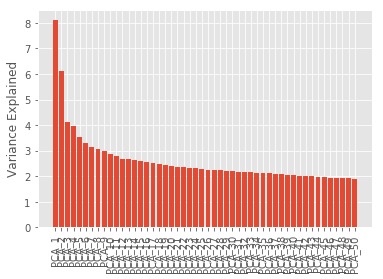

In [137]:
pca_range = np.arange(n_components) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, pca.explained_variance_, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Variance Explained')

Text(0, 0.5, 'Variance Explained')

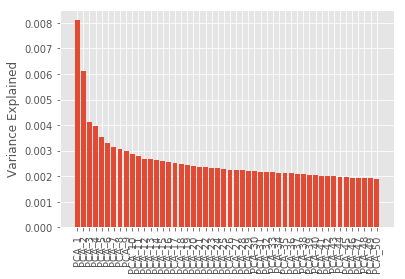

In [138]:
plt.bar(pca_range, pca.explained_variance_ratio_, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Variance Explained')

## Classifying positive/negative review with PCA preprocessing

### Define evaluation matrix

In [162]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [157]:
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [161]:
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [159]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [139]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_trans, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [141]:
# Get score for training set
lr_model.score(X_train_trans, y_train) # R^2 of the prediction.

0.845606907059421

In [142]:
# Get score for test set
lr_model.score(X_test_trans, y_test)

0.7766497461928934

#### Use (Stardardized + PCA) tf-idf vectors as features

In [143]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

lr_model_pca = LogisticRegression()

lr_model_pca.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
# Get score for training set
lr_model_pca.score(X_train_scaled, y_train)

0.9106145251396648

In [145]:
# Get score for test set, REMEMBER to use PCA-transformed X!
lr_model_pca.score(X_test_scaled, y_test)

0.7380710659898477

              train      test
metrics                      
AUC        0.929305  0.866143
Accuracy   0.845607  0.776650
Precision  0.838354  0.762500
Recall     0.746239  0.628866
f1-score   0.789619  0.689266


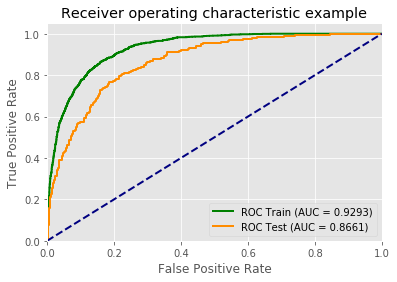

In [163]:
train_test_model(lr_model ,X_train_trans, y_train, X_test_trans, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              train      test
metrics                      
AUC        0.971809  0.811882
Accuracy   0.910615  0.738071
Precision  0.886408  0.673797
Recall     0.882930  0.649485
f1-score   0.884666  0.661417


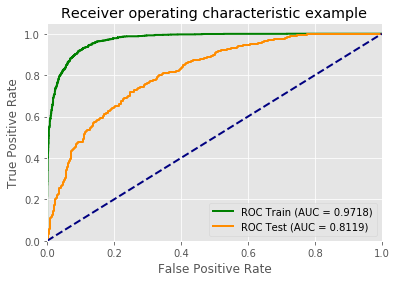

In [164]:
train_test_model(lr_model_pca ,X_train_scaled, y_train, X_test_scaled, y_test)

#### After the processing of PCA, there shows a trend of more overfitting than tf-idf vector trained model

#### Plot the coefficients against principal components


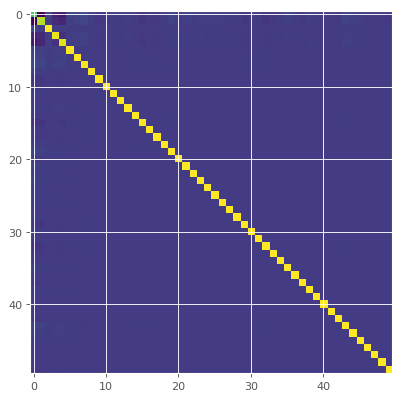

(50, 50)

In [154]:
# Plot coefficients of principal components
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(np.cov(pca.components_))
plt.show()

np.cov(pca.components_).shape

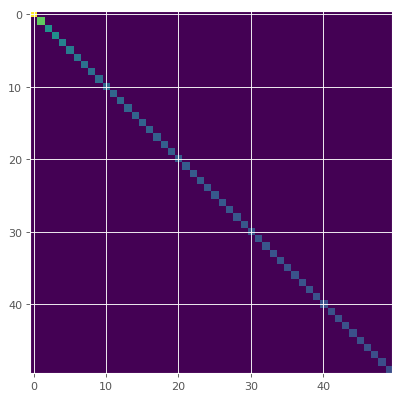

In [156]:
# Plot covariance of transformed feature matrix
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(np.cov(train_components.T))
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

              train      test
metrics                      
AUC        0.897528  0.829072
Accuracy   0.782123  0.727919
Precision  0.855026  0.803030
Recall     0.528450  0.409794
f1-score   0.653193  0.542662


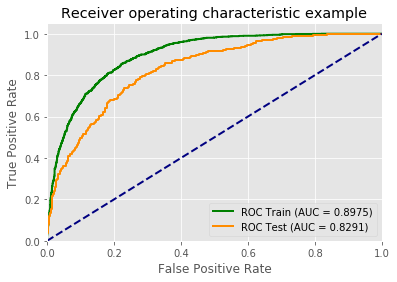

In [165]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

rf_clf = RandomForestClassifier(**parameters)


# Train test model
train_test_model(rf_clf, X_train_trans, y_train, X_test_trans, y_test)

#### Use (Stardardized + PCA) tf-idf vectors as features

              train      test
metrics                      
AUC        0.897528  0.829072
Accuracy   0.782123  0.727919
Precision  0.855026  0.803030
Recall     0.528450  0.409794
f1-score   0.653193  0.542662


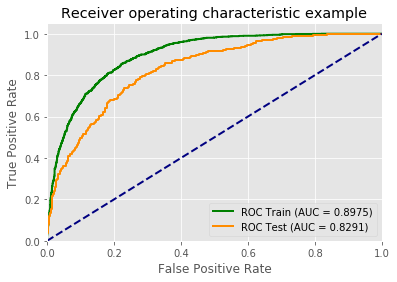

In [166]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf_pca = RandomForestClassifier(**parameters)

train_test_model(rf_clf_pca, X_train_scaled, y_train, X_test_scaled, y_test)

#### In Random Forest model, tf-idf vector and pca shows quite similar performance with less overfitting than logistic regression